In [19]:
import numpy as np
import csv

class reader(object):
  def __init__(self, data_file = "./data/wdbc.data"):
    self.value = []
    with open(data_file, "rb") as f:
      csv_reader = csv.reader(f, delimiter=",")
      for i, row in enumerate(csv_reader):
        self.value.append(row)
    # print self.value[0]
    # print self.value[0][0]
    # print self.value[0][1]

    self.raw_to_vector(self.value)
    self.split(num_validation_examples=114)
    
#     print self.id.shape
#     print self.x.shape
#     print self.y.shape
    
    self.num_examples = len(self.x_train)
    self.start_index = 0
    self.shuffle_indices = range(self.num_examples)

    self.num_examples_val = len(self.x_val) # = 114 (validation_data)
    self.start_index_val = 0
    self.shuffle_indices_val = range(self.num_examples_val)
#     print self.num_examples_val

  def raw_to_vector(self, value):
    self.id = []
    self.x = []
    self.y = []
    self.diag = ['Benign', 'Malignant']
    

    for row in self.value:
        x = np.zeros(30)
        for i in range(30):
            x[i] = float(row[i+2])
        if row[1] == "B":
            y = 0
        else:
            y = 1
        self.x.append(x)
        self.y.append(y)
        id = int(row[0])
        self.id.append(id)
        
    self.x, self.y, self.id, self.diag = np.array(self.x), np.array(self.y), np.array(self.id), np.array(self.diag)

  def split(self, num_validation_examples):
    self.x_train = self.x[ num_validation_examples: ]
    self.x_val = self.x[ : num_validation_examples ]

    self.y_train = self.y[ num_validation_examples: ]
    self.y_val = self.y[ : num_validation_examples ]

    self.id_train = self.id[ num_validation_examples: ]
    self.id_val = self.id[ :num_validation_examples ]

  def next_batch(self, batch_size, split="train"):

    if split == "train":
      if self.start_index == 0:
        np.random.shuffle(self.shuffle_indices) # shuffle indices

      end_index = min([self.num_examples, self.start_index + batch_size])
      batch_indices = [ self.shuffle_indices[idx] for idx in range(self.start_index, end_index) ]

      batch_x = self.x_train[ batch_indices ]
      batch_y = self.y_train[ batch_indices ]
      batch_id = self.id_train[ batch_indices ] 

      if end_index == self.num_examples:
        self.start_index = 0
      else: self.start_index = end_index

      return batch_x, batch_y, batch_id 

    elif split == "val":
      if self.start_index_val == 0:
        np.random.shuffle(self.shuffle_indices_val) # shuffle indices

      end_index = min([self.num_examples_val, self.start_index_val + batch_size])
      batch_indices = [ self.shuffle_indices_val[idx] for idx in range(self.start_index_val, end_index) ]

      batch_x = self.x_val[ batch_indices ]
      batch_y = self.y_val[ batch_indices ]
      batch_id = self.id_val[ batch_indices ] 

      if end_index == self.num_examples_val:
        self.start_index_val = 0
      else: self.start_index_val = end_index

      return batch_x, batch_y, batch_id  

('Number of observations in the training data:', 415)
('Number of observations in the test data:', 154)
n_estimator 500
Accuracy:	0.980519


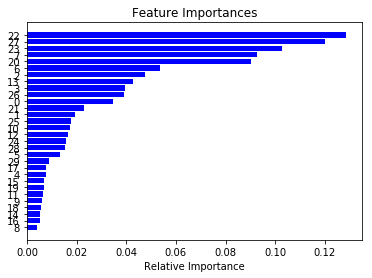

In [38]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create an object called iris with the iris data
iris = load_iris()
data1 = reader()
# print data1.diag

# Create a dataframe with the 30 feature variables
df = pd.DataFrame(data1.x, columns=range(30))

# View the top 5 rows
# print df.head()

# Add a new column with the species names, this is what we are going to try to predict
df['diagnosis'] = pd.Categorical.from_codes(data1.y, data1.diag)

# View the top 5 rows
# print df.head()

# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
# print df.head()

# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

# Create a list of the feature column's names
features = df.columns[:30]

# print features

# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['diagnosis'])[0]
# print'__________'
# print y
# Create a random forest classifier. By convention, clf means 'classifier'
nnn = 500
clf = RandomForestClassifier(criterion='entropy', n_jobs=2, n_estimators=nnn)

####
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#            max_depth=None, max_features='auto', max_leaf_nodes=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
#            oob_score=False, random_state=None, verbose=0,
#            warm_start=False)
###

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

# Apply the classifier we trained to the test data (which, remember, it has never seen before)
# print'__________'
# print test[features]
# print clf.predict(test[features])    #shows only the feature info, not 

# View the predicted probabilities of the first 10 observations
# print clf.predict_proba(test[features])[0:10]

# Create actual english names for the plants for each predicted plant class
preds = data1.diag [clf.predict(test[features])]
# print "__________________________________asdfads_________"
# print preds
a = []
for i in range(len(test)):
    if np.array(test['diagnosis'])[i] == 'Benign':
        a.append('Malignant')
    else:
        a.append ('Benign')
# print a
a = np.array(a)
# View the PREDICTED species for the first five observations
# print preds[0:5]

# View the ACTUAL species for the first five observations
# print test['diagnosis'].head()

# Create confusion matrix
# print'============================='
# print pd.crosstab(test['diagnosis'], preds, rownames=['Actual diagnosis'], colnames=['Predicted diagnosis'])


#Compute prediction accuracy 
numOfCorrectPrediction = (preds == a).sum() 
# print (preds == a)
numOfDataSamples = a.shape[0]  
print 'n_estimator', nnn
print "Accuracy:\t%f"%(numOfCorrectPrediction / float(numOfDataSamples))


####
## Visualize the first estimator tree of the random forest
####
#dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,\
#                       feature_names=iris.feature_names,\
#                       class_names=iris.target_names,\
#                       filled=True, rounded=True,\
#                       special_characters=True)
#graph = graphviz.Source(dot_dat0a)
#graph.render("iris_rf0")
#graph.view("iris_rf0")


####
## Computing variable importance
####

# View a list of the features and their importance scores
# print list(zip(train[features], clf.feature_importances_))


# plotting variable importance
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()